<a href="https://colab.research.google.com/github/raheeltahir55/CE888/blob/main/Project/Proj_MultiEval_Emotion_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### EMOTION ####
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import io
import requests
import zipfile

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import SpatialDropout1D
import tensorflow as tf
from keras.layers import Bidirectional
from keras.models import load_model

In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
pip install nlpaug

     |████████████████████████████████| 399kB 18.5MB/s 


In [5]:
pip install torch>=1.6.0 transformers>=4.0.0

In [6]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf

from nlpaug.util import Action

In [7]:
r= requests.get('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/train_text.txt', allow_redirects= True)
open('train_text.txt', 'wb').write(r.content)
example1 = "/content/train_text.txt"
with open(example1, "r") as file1:
    data = file1.readlines()

In [8]:
r= requests.get('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/train_labels.txt', allow_redirects= True)
open('train_labels.txt', 'wb').write(r.content)
example1 = "/content/train_labels.txt"
with open(example1, "r") as file1:
    data1 = file1.readlines()

In [9]:
r= requests.get('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/test_text.txt', allow_redirects= True)
open('test_text.txt', 'wb').write(r.content)
example1 = "/content/test_text.txt"
with open(example1, "r") as file1:
    data2 = file1.readlines()

In [10]:
r= requests.get('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/test_labels.txt', allow_redirects= True)
open('test_labels.txt', 'wb').write(r.content)
example1 = "/content/test_labels.txt"
with open(example1, "r") as file1:
    data3 = file1.readlines()

In [11]:
r= requests.get('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/val_text.txt', allow_redirects= True)
open('val_text.txt', 'wb').write(r.content)
example1 = "/content/val_text.txt"
with open(example1, "r") as file1:
    data4 = file1.readlines()

In [12]:
r= requests.get('https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/emotion/val_labels.txt', allow_redirects= True)
open('val_labels.txt', 'wb').write(r.content)
example1 = "/content/val_labels.txt"
with open(example1, "r") as file1:
    data5 = file1.readlines()

In [13]:
data= [data[i].strip() for i in range(len(data))]
data1= [data1[i].strip() for i in range(len(data1))]
data2= [data2[i].strip() for i in range(len(data2))]
data3= [data3[i].strip() for i in range(len(data3))]
data4= [data4[i].strip() for i in range(len(data4))]
data5= [data5[i].strip() for i in range(len(data5))]

In [14]:
## df is dataframe for training

df= pd.DataFrame()
for index in range(len(data)):
  df.loc[index, 'Text']=data[index]
for index in range(len(data1)):
  df.loc[index, 'Label']=data1[index]
df.head()

,Text,Label
0,“Worry is a down payment on a problem you may ...,2
1,My roommate: it's okay that we can't spell bec...,0
2,No but that's so cute. Atsu was probably shy a...,1
3,Rooneys fucking untouchable isn't he? Been fuc...,0
4,it's pretty depressing when u hit pan on ur fa...,3


In [15]:
## df1 is dataframe for test

df1= pd.DataFrame()
for index in range(len(data2)):
  df1.loc[index, 'Text']=data2[index]
for index in range(len(data3)):
  df1.loc[index, 'Label']=data3[index]
df1.head()

,Text,Label
0,#Deppression is real. Partners w/ #depressed p...,3
1,@user Interesting choice of words... Are you c...,0
2,My visit to hospital for care triggered #traum...,3
3,@user Welcome to #MPSVT! We are delighted to h...,1
4,What makes you feel #joyful?,1


In [16]:
## df2 is dataframe for validation

df2= pd.DataFrame()
for index in range(len(data4)):
  df2.loc[index, 'Text']=data4[index]
for index in range(len(data5)):
  df2.loc[index, 'Label']=data5[index]
df2.head()

,Text,Label
0,"@user @user Oh, hidden revenge and anger...I r...",0
1,if not then #teamchristine bc all tana has don...,0
2,Hey @user #Fields in #skibbereen give your onl...,0
3,Why have #Emmerdale had to rob #robron of havi...,0
4,@user I would like to hear a podcast of you go...,0


In [17]:
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [18]:
aug = naw.ContextualWordEmbsAug(
    model_path='bert-base-uncased', action="substitute")

In [ ]:
# # model_type: word2vec, glove or fasttext
# aug_w2v = naw.WordEmbsAug(
# #     model_type='word2vec', model_path='../input/nlpword2vecembeddingspretrained/GoogleNews-vectors-negative300.bin',
#     model_type='glove', model_path='/content/glove.6B.100d.txt',
#     action="substitute")

In [ ]:
# llist= [aug_w2v.augment(entry) for entry in df2['Text']]

In [20]:
df= pd.concat([df, df2], ignore_index= True)

In [21]:
Text_Train= []
Text_Final= []
# Step - a : Remove blank rows if any.

df.dropna(inplace=True)

# df['Text'] = [aug.augment(entry) for entry in df['Text']]

# Step - b : Change all the text to lower case.
df['Text'] = [entry.lower() for entry in df['Text']]

# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
df['Text']= [word_tokenize(entry) for entry in df['Text']]

for index,entry in enumerate(df['Text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'Text_Final'] = str(Final_words) 
    Text_Train.append(Final_words)
    Text_Final.append(Final_words)

In [22]:
Text_Test= []
# Step - a : Remove blank rows if any.

#df1['Text']= df1['Text'].astype(str)
df1.dropna(inplace=True)

# Step - b : Change all the text to lower case. 
df1['Text'] = [entry.lower() for entry in df1['Text']]

# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
df1['Text']= [word_tokenize(entry) for entry in df1['Text']]

for index,entry in enumerate(df1['Text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    df1.loc[index,'Text_Final'] = str(Final_words)
    Text_Test.append(Final_words)

In [23]:
Text_Final.extend(Text_Test)

In [24]:
print(len(Text_Final))

5052


In [25]:
t_df= pd.concat([df, df1])
t_df['Label'].value_counts()

0    2118
3    1326
1    1163
2     445
Name: Label, dtype: int64

In [26]:
df['Label'].value_counts()

0    1560
3     944
1     805
2     322
Name: Label, dtype: int64

In [27]:
df1['Label'].value_counts()

0    558
3    382
1    358
2    123
Name: Label, dtype: int64

In [28]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each tweet.
MAX_SEQUENCE_LENGTH = 20
# This is fixed.
EMBEDDING_DIM = 300

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(Text_Final)
word_index = tokenizer.word_index

In [29]:
print('Found %s unique tokens.' % len(word_index))

Found 8987 unique tokens.


In [30]:
print(word_index)

{'user': 1, 'get': 2, 'like': 3, 'go': 4, 'amp': 5, 'make': 6, 'u': 7, 'people': 8, 'one': 9, 'know': 10, 'think': 11, 'day': 12, 'love': 13, 'time': 14, 'say': 15, 'look': 16, 'want': 17, 'feel': 18, 'see': 19, 'sad': 20, 'need': 21, 'would': 22, 'really': 23, 'good': 24, 'watch': 25, 'bad': 26, 'take': 27, 'even': 28, 'back': 29, 'ca': 30, 'fuck': 31, 'still': 32, 'today': 33, 'work': 34, 'fear': 35, 'lose': 36, 'thing': 37, 'start': 38, 'life': 39, 'never': 40, 'let': 41, 'angry': 42, 'someone': 43, 'come': 44, 'happy': 45, 'much': 46, 'try': 47, 'depression': 48, 'way': 49, 'year': 50, 'well': 51, 'right': 52, 'tell': 53, 'man': 54, 'new': 55, 'use': 56, 'could': 57, 'sadness': 58, 'play': 59, 'find': 60, 'give': 61, 'ever': 62, 'terrorism': 63, 'im': 64, 'na': 65, 'anger': 66, 'awful': 67, 'stop': 68, 'rage': 69, 'fume': 70, 'smile': 71, 'last': 72, 'always': 73, 'leave': 74, 'shit': 75, 'anxiety': 76, 'call': 77, 'night': 78, 'cry': 79, 'talk': 80, 'bully': 81, 'outrage': 82, 'gu

In [31]:
df.head()

,Text,Label,Text_Final
0,"[“, worry, is, a, down, payment, on, a, proble...",2,"['worry', 'payment', 'problem', 'may', 'never'..."
1,"[my, roommate, :, it, 's, okay, that, we, ca, ...",0,"['roommate', 'okay', 'ca', 'spell', 'autocorre..."
2,"[no, but, that, 's, so, cute, ., atsu, was, pr...",1,"['cute', 'atsu', 'probably', 'shy', 'photo', '..."
3,"[rooneys, fucking, untouchable, is, n't, he, ?...",0,"['rooneys', 'fuck', 'untouchable', 'fuck', 'dr..."
4,"[it, 's, pretty, depressing, when, u, hit, pan...",3,"['pretty', 'depress', 'u', 'hit', 'pan', 'ur',..."


In [32]:
df1.head()

,Text,Label,Text_Final
0,"[#, deppression, is, real, ., partners, w/, #,...",3,"['deppression', 'real', 'partner', 'depressed'..."
1,"[@, user, interesting, choice, of, words, ...,...",0,"['user', 'interesting', 'choice', 'word', 'con..."
2,"[my, visit, to, hospital, for, care, triggered...",3,"['visit', 'hospital', 'care', 'trigger', 'trau..."
3,"[@, user, welcome, to, #, mpsvt, !, we, are, d...",1,"['user', 'welcome', 'mpsvt', 'delight', 'grate..."
4,"[what, makes, you, feel, #, joyful, ?]",1,"['make', 'feel', 'joyful']"


In [33]:
X_train = tokenizer.texts_to_sequences(Text_Train)
X_test = tokenizer.texts_to_sequences(Text_Test)

In [34]:
X_train[3], X_train[1], X_test[1], X_test[3]

([3898, 31, 3899, 31, 254, 3900, 16, 1508, 3901, 151],
 [1506, 331, 30, 1897, 1507, 85, 2487],
 [1, 1176, 869, 146, 3336, 569, 1495, 63, 200, 411, 511, 32],
 [1, 1049, 3754, 442, 1097, 3754, 623])

In [35]:
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

In [36]:
X_train= np.array(X_train)
X_test= np.array(X_test)
print('Shape of data tensor:', X_train.shape)
print('Shape of data tensor:', X_test.shape)

Shape of data tensor: (3631, 20)
Shape of data tensor: (1421, 20)


In [37]:
X_train[1,:], X_test[1,:]

(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 1506,  331,   30, 1897, 1507,   85, 2487], dtype=int32),
 array([   0,    0,    0,    0,    0,    0,    0,    0,    1, 1176,  869,
         146, 3336,  569, 1495,   63,  200,  411,  511,   32], dtype=int32))

In [38]:
X_train[:,3], X_test[:,3]

(array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int32))

In [39]:
df= pd.get_dummies(df, columns= ['Label'])

In [40]:
out_test= df1['Label'].values
df1= pd.get_dummies(df1, columns= ['Label'])

In [41]:
df.head()

,Text,Text_Final,Label_0,Label_1,Label_2,Label_3
0,"[“, worry, is, a, down, payment, on, a, proble...","['worry', 'payment', 'problem', 'may', 'never'...",0,0,1,0
1,"[my, roommate, :, it, 's, okay, that, we, ca, ...","['roommate', 'okay', 'ca', 'spell', 'autocorre...",1,0,0,0
2,"[no, but, that, 's, so, cute, ., atsu, was, pr...","['cute', 'atsu', 'probably', 'shy', 'photo', '...",0,1,0,0
3,"[rooneys, fucking, untouchable, is, n't, he, ?...","['rooneys', 'fuck', 'untouchable', 'fuck', 'dr...",1,0,0,0
4,"[it, 's, pretty, depressing, when, u, hit, pan...","['pretty', 'depress', 'u', 'hit', 'pan', 'ur',...",0,0,0,1


In [42]:
df1.head()

,Text,Text_Final,Label_0,Label_1,Label_2,Label_3
0,"[#, deppression, is, real, ., partners, w/, #,...","['deppression', 'real', 'partner', 'depressed'...",0,0,0,1
1,"[@, user, interesting, choice, of, words, ...,...","['user', 'interesting', 'choice', 'word', 'con...",1,0,0,0
2,"[my, visit, to, hospital, for, care, triggered...","['visit', 'hospital', 'care', 'trigger', 'trau...",0,0,0,1
3,"[@, user, welcome, to, #, mpsvt, !, we, are, d...","['user', 'welcome', 'mpsvt', 'delight', 'grate...",0,1,0,0
4,"[what, makes, you, feel, #, joyful, ?]","['make', 'feel', 'joyful']",0,1,0,0


In [43]:
Labels_=['Label_0','Label_1','Label_2','Label_3']

In [44]:
y_train= df[Labels_].values
y_test= df1[Labels_].values

In [45]:
print(y_train[0,:])

[0 0 1 0]


In [46]:
print(y_train[0:10])

[[0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-04-25 14:30:53--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-04-25 14:30:54--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-04-25 14:30:54--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [50]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3

In [48]:
url= "https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip"
r=requests.get(url)
z=zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [49]:
## FastText
import codecs
embeddings_index = {}
f=codecs.open('/content/wiki-news-300d-1M.vec', encoding= 'utf-8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 999995 word vectors.


In [ ]:
# ## GLOVE
# embeddings_index = {}
# f = open(GLOVE_EMB, encoding="utf8")
# for line in f:
#   values = line.split()
#   word = values[0]
#   coefs = np.asarray(values[1:], dtype='float32')
#   embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [51]:
vocab_size= MAX_NB_WORDS
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
words_not_found= []
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None: 
    embedding_matrix[i] = embedding_vector
  else:
    words_not_found.append(word)

In [52]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [53]:
# for word, i in word_index.items():
#   embedding_vector = embeddings_index.get(word)
#   print(word)
#   print(embedding_vector)

In [54]:
print(embedding_matrix[1:2,:])

[[ 0.0793      0.0079      0.0555     -0.0205      0.0599     -0.0173
  -0.0016      0.0223      0.0595     -0.0254     -0.0138     -0.1036
   0.0826      0.1204      0.0047     -0.0539     -0.0558      0.27970001
  -0.0729      0.0893     -0.18610001 -0.2061      0.15899999  0.0328
  -0.0833     -0.0096     -0.0399     -0.0598     -0.1119     -0.0052
  -0.0543      0.0368      0.0578     -0.0288      0.0152      0.16
   0.1459      0.0465     -0.1142     -0.0805      0.1349      0.0502
   0.0654     -0.0773     -0.1373     -0.21269999 -0.0183     -0.048
   0.0552      0.0953     -0.0552      0.0823     -0.6591      0.1621
   0.21070001  0.0116     -0.022      -0.0585     -0.0517      0.0312
   0.14929999  0.021      -0.1256      0.0572      0.0276     -0.0512
  -0.0944     -0.0964     -0.0221     -0.0047     -0.0039      0.1116
  -0.0239      0.1679      0.0164     -0.1096     -0.0972      0.0773
   0.0245      0.13869999  0.0412      0.0705      0.036      -0.175
   0.0887     -0.105

In [55]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [56]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
# x = Conv1D(32, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.5, recurrent_dropout=0.5))(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
outputs = Dense(4, activation='softmax')(x)
model = tf.keras.Model(sequence_input, outputs)

In [57]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 20, 300)           3000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 20, 300)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               186880    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68    

In [58]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='categorical_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [59]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on GPU...


In [60]:
BATCH_SIZE = 64
EPOCHS = 50

In [61]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                   validation_data= (X_test,y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/50
57/57 [==============================] - 16s 155ms/step - loss: 1.3161 - accuracy: 0.3812 - val_loss: 1.2028 - val_accuracy: 0.3927
Epoch 2/50
57/57 [==============================] - 8s 148ms/step - loss: 1.1345 - accuracy: 0.5081 - val_loss: 0.9014 - val_accuracy: 0.6742
Epoch 3/50
57/57 [==============================] - 8s 144ms/step - loss: 0.9396 - accuracy: 0.6308 - val_loss: 0.8266 - val_accuracy: 0.6918
Epoch 4/50
57/57 [==============================] - 8s 145ms/step - loss: 0.8834 - accuracy: 0.6553 - val_loss: 0.7669 - val_accuracy: 0.7171
Epoch 5/50
57/57 [==============================] - 8s 145ms/step - loss: 0.8549 - accuracy: 0.6627 - val_loss: 0.7253 - val_accuracy: 0.7417
Epoch 6/50
57/57 [==============================] - 8s 142ms/step - loss: 0.8016 - accuracy: 0.6909 - val_loss: 0.7348 - val_accuracy: 0.7333
Epoch 7/50
57/57 [==============================] - 8s 145ms/step - loss: 0.7874 - accuracy: 0.6956 - val_loss: 0.7462 - val_accuracy: 0.7234
Epoch

In [62]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

45/45 [==============================] - 1s 12ms/step - loss: 0.6359 - accuracy: 0.7818
Test set
  Loss: 0.636
  Accuracy: 0.782


In [63]:
y_pred = model.predict(X_test)
out_pred= [np.argmax(y_pred[i,:]) for i in range(y_pred.shape[0])]
out_test=out_test.astype(np.int32)
out_pred= np.array(out_pred)

In [ ]:
from sklearn.metrics import f1_score
print("F1 Score -> ",f1_score(out_pred, out_test, average='macro')*100)

F1 Score ->  73.07274611610103


In [ ]:
model.save('multieval_emotion_lstm.h5')

In [ ]:
# model = load_model('../input/offensive-lstm/multieval_offensive_lstm.h5')

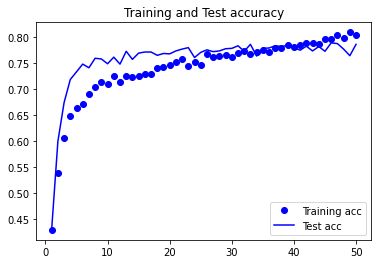

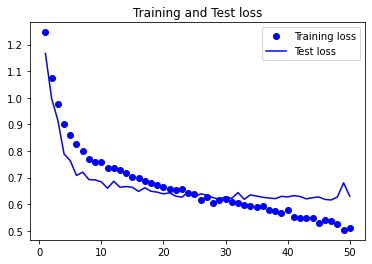

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Test acc')
plt.title('Training and Test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.legend()


In [65]:
print(y_pred[0:5,:])

[[1.7555340e-03 4.6025353e-04 8.3804491e-04 9.9694616e-01]
 [8.7270862e-01 1.3670929e-02 3.9545596e-02 7.4074894e-02]
 [1.2625998e-04 3.9972394e-05 7.5250842e-05 9.9975854e-01]
 [3.7044633e-04 9.9813461e-01 2.4448225e-04 1.2504425e-03]
 [2.0608769e-04 9.8511302e-01 3.7807526e-04 1.4302723e-02]]
